### Student Information
Name: 黃恩平

Student ID: 111033622

GitHub ID: npinghuange

Kaggle name: nnphuang

Kaggle private scoreboard snapshot:

![Snapshot](pics/kaggle_ranking.png)

---
### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

---
# Part 1

# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [43]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [44]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [45]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [46]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [47]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [48]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import sklearn
import helpers.data_mining_helpers as dmh
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
# print(train_counts[0])
term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))
import plotly.express as px

# Plot the distribution using higher frequency features.
SIZE = 30 # how many phrase to display
sorted = pd.DataFrame(term_frequencies, columns=['freq'])
sorted = sorted.sort_values(by=['freq'], ascending=False)
idx = (sorted.index).to_list()[:SIZE]

fig = px.bar(
             x=count_vect.get_feature_names_out()[idx], y=sorted[:SIZE]['freq'].to_list(),
             labels = {'x':'Feature names', 'y':'Frequencies'},
             title  = "Distribution of Features",
             category_orders = count_vect.get_feature_names_out()[idx]
            )
fig.update_traces(texttemplate=sorted[:SIZE]['freq'].to_list(), textposition='outside')
fig.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [50]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [11]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [51]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

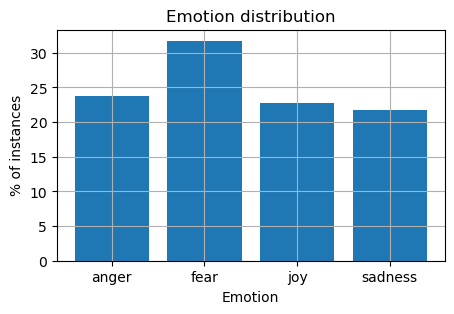

In [52]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [55]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [56]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [57]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [58]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [60]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [61]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [62]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\huang\.conda\envs\data_mining\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [63]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [65]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [66]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
TFIDF_500.fit(train_df['text'])

TfidfVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x000002C6B9ABDC60>)

In [67]:
TFIDF_feature_names_500 = TFIDF_500.get_feature_names_out()
TFIDF_feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [69]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'sadness', 'fear', 'joy', 'sadness', 'anger',
       'fear', 'sadness', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [70]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [71]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [72]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [73]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

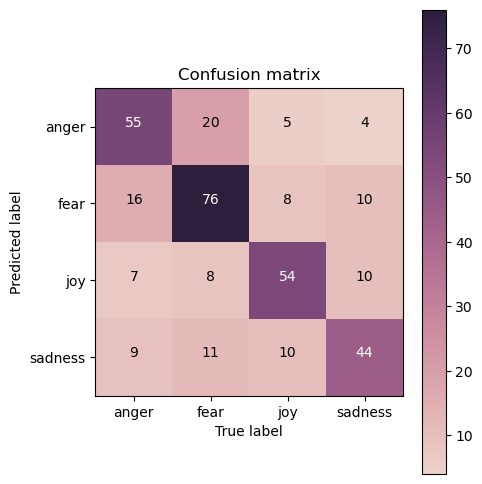

In [74]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The confusion matrix is to show the difference between prediction result and actual data. It's a great way to visualize prediction result and can let people know how well the prediction is. Also, it can show that if the perdiction is wrong, which class did it predict. 
So in the confusion matrix above, the matching columns and rows that are the same class have darker shade and higher value means that the prediction is highly accurate. In contrast, the non-matching columns and rows have ligther shade and lower value means that the wrong prediction is much less than the correct prediction.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [75]:
# Answer here

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

bow_pred_train = clf.predict(X_train)
bow_pred_test  = clf.predict(X_test)

bow_acc_train = accuracy_score(y_true=y_train, y_pred=bow_pred_train)
bow_acc_test  = accuracy_score(y_true=y_test,  y_pred=bow_pred_test)

print('(BOW 500)training accuracy: {}'.format(round(bow_acc_train, 2)))
print('(BOW 500)testing  accuracy: {}'.format(round(bow_acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=bow_pred_test))

(BOW 500)training accuracy: 0.79
(BOW 500)testing  accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


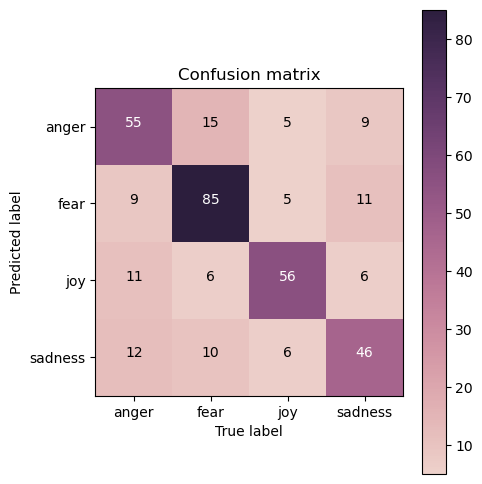

In [76]:
# plot your confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=bow_pred_test) 
print(cm)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision tree\
training accuracy: 0.99\
testing accuracy: 0.66\
Naives Bayes model\
training accuracy: 0.79\
testing  accuracy: 0.7\
Although decision have higher training accuracy, the testing accuracy is lower than Naives Bayes model. This is beacuase decision can easily overfit on the data. Resulting in high training accuracy but low testing accuracy. On the other hand, the Naives Bayes model can predict better on the testing data.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [77]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [78]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1249       fear
2903    sadness
2009        joy
1950       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [79]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [80]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

### 6.4 Train

In [83]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 5s 48ms/step - loss: 0.5798 - accuracy: 0.7921 - val_loss: 0.7944 - val_accuracy: 0.6974
Epoch 2/25
113/113 [==============================] - 1s 7ms/step - loss: 0.4187 - accuracy: 0.8464 - val_loss: 0.8392 - val_accuracy: 0.6571
Epoch 3/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3484 - accuracy: 0.8741 - val_loss: 0.8660 - val_accuracy: 0.6657
Epoch 4/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2791 - accuracy: 0.9026 - val_loss: 0.9108 - val_accuracy: 0.6628
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2306 - accuracy: 0.9233 - val_loss: 0.9492 - val_accuracy: 0.6772
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.1939 - accuracy: 0.9352 - val_loss: 0.9970 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9505 - val_loss: 1.0866 - val_accuracy: 0.6715
Epoch

### 6.5 Predict on testing data

In [84]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 3ms/step


array([[5.8597536e-04, 1.3706322e-01, 1.5366570e-06, 8.6234927e-01],
       [3.2413894e-07, 9.9747711e-01, 1.8645523e-12, 2.5225689e-03],
       [1.2395469e-01, 8.7603241e-01, 1.1239229e-05, 1.5316525e-06],
       [3.7544757e-02, 9.6245372e-01, 3.0284678e-11, 1.4811163e-06],
       [9.2127266e-05, 2.1966806e-01, 1.1144535e-05, 7.8022861e-01]],
      dtype=float32)

In [85]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'fear', 'fear', 'sadness'], dtype=object)

In [86]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [87]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.792139,0.579781,0.697406,0.794417
1,1,0.846388,0.418723,0.657061,0.839188
2,2,0.874066,0.348392,0.665706,0.865976
3,3,0.902574,0.279129,0.662824,0.910844
4,4,0.923332,0.230576,0.677233,0.949165
5,5,0.935234,0.193890,0.682997,0.996967
6,6,0.950457,0.168227,0.671470,1.086608
7,7,0.956546,0.148527,0.680115,1.142531
8,8,0.962912,0.125335,0.680115,1.226489
9,9,0.963465,0.121164,0.674352,1.231202


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

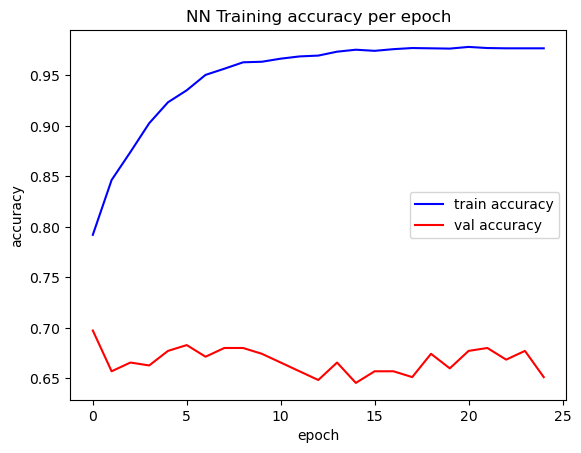

In [88]:
plt.plot('epoch', 'accuracy', data=training_log, color = 'b', label='train accuracy')
plt.plot('epoch', 'val_accuracy', data=training_log, color = 'r', label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('NN Training accuracy per epoch')
plt.legend()
plt.show()

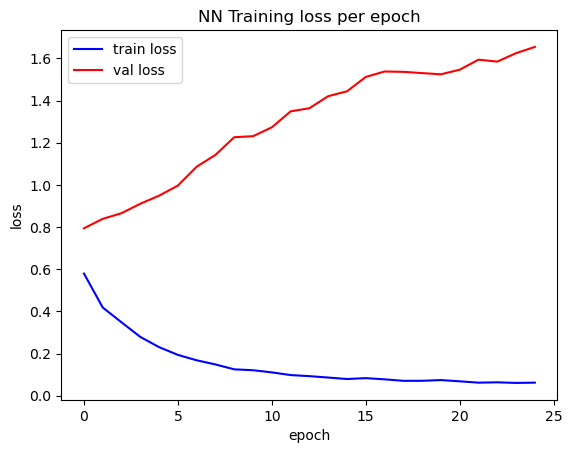

In [89]:
plt.plot('epoch', 'loss', data=training_log, color = 'b', label='train loss')
plt.plot('epoch', 'val_loss', data=training_log, color = 'r', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('NN Training loss per epoch')
plt.legend()
plt.show()

#### Interpretation
By observing the training & val accuracy and loss, we can check for sign for overfitting and underfitting. As the plots above showed, the training accuracy and loss are both very good. However, the val accuracy and loss are not performing well, and the val loss even got higher and higher. It is very evident that the model is overfitting, meaning that the prediction is too based on the training data so it can not perform well on unseen data. 

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [90]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1249,20392,When my 4yo is gone I blast gothcore music. Sh...,"[When, my, 4yo, is, gone, I, blast, gothcore, ..."
2903,40076,@6itmap I can't help but feel melancholic!,"[@, 6itmap, I, ca, n't, help, but, feel, melan..."
2009,30005,"Today I reached 1000 subscribers on YT!! , #go...","[Today, I, reached, 1000, subscribers, on, YT,..."
1950,21093,Hey no turn over after a kick - way to go Texa...,"[Hey, no, turn, over, after, a, kick, -, way, ..."
972,20115,@excalibater I'm very shy irl and lately I fee...,"[@, excalibater, I, 'm, very, shy, irl, and, l..."


In [91]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['When', 'my', '4yo', 'is', 'gone', 'I', 'blast', 'gothcore', 'music', '.', 'She', 'has', '#', 'anxiety', '&', 'amp', ';', 'I', 'ca', "n't", 'listen', '2', 'it', 'around', 'her', 'bcuz', 'it', "'s", "'too", 'spooky', "'", '.', '*', 'sigh', '*', '#', 'momlife']),
       list(['@', '6itmap', 'I', 'ca', "n't", 'help', 'but', 'feel', 'melancholic', '!']),
       list(['Today', 'I', 'reached', '1000', 'subscribers', 'on', 'YT', '!', '!', ',', '#', 'goodday', ',', '#', 'thankful'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [92]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [93]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.6522712 ,  0.07491605, -0.46906734, -0.06241857,  0.06174579,
       -1.563503  ,  0.5615077 ,  1.6981999 , -0.4922453 , -0.45262164,
       -0.57535636, -0.89512134, -0.26973906,  0.304444  , -0.12301728,
       -0.12206492,  0.5381164 , -0.3353693 ,  0.6795371 , -1.3236841 ,
        0.5137414 ,  0.60276663,  0.7145538 , -0.16115561,  0.35316604,
        0.13766876, -0.25895047,  0.6458811 , -0.25602296,  0.29437602,
        0.5041095 , -0.22683463,  0.60342085, -0.47147056, -0.26590267,
        0.5176004 ,  0.17572987, -0.09685841, -0.3326026 , -0.54059285,
        0.3747442 ,  0.11512391, -0.23748791, -0.05857009,  0.64666647,
       -0.32027078, -0.651676  ,  0.07765273,  0.40292287,  0.6479009 ,
       -0.1402418 , -0.29835543, -0.32586235,  0.07571074, -0.72150314,
       -0.47306716, -0.2637648 , -0.2028092 , -0.2265476 ,  0.38565034,
        0.08682194,  0.41033682,  0.39192432,  0.17648393, -0.63905513,
        0.7887802 ,  0.6040556 ,  0.3299588 , -1.140613  ,  0.40

In [94]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('bday', 0.9419281482696533),
 ('birthday', 0.9279380440711975),
 ('Makes', 0.9172442555427551),
 ('👌', 0.9047141671180725),
 ('cry', 0.9044986367225647),
 ('plz', 0.9014309048652649),
 ('Be', 0.8994293808937073),
 ('twooo', 0.8944501876831055),
 ('Online', 0.892106831073761),
 ('chance', 0.8908570408821106)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [95]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [96]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [97]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


Using word vector to represent the sentence may have some issues. First, every sentences' length vary, so some shorter sentence may have a very sparse matrix. So there's some work to do when using word vector to represent a sentence.
1. Implementing Doc2Vec : Use the package to fit and transform the data set into sentence vectors.
2. Caculate the average of Word Vectors : Calculate all world vecotrs' average. But by doing this step, the information regarding the order of the words within the sentence.
3. Calculate the average of Word Vectors with TF-IDF : By multiplying TF-IDF score before taking the average of each sentences, we can represent the frequency of the words within the sentence out of all the data. This can retain more information of the original sentence, hence making the model prediction better.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [98]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [99]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [100]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [101]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [102]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

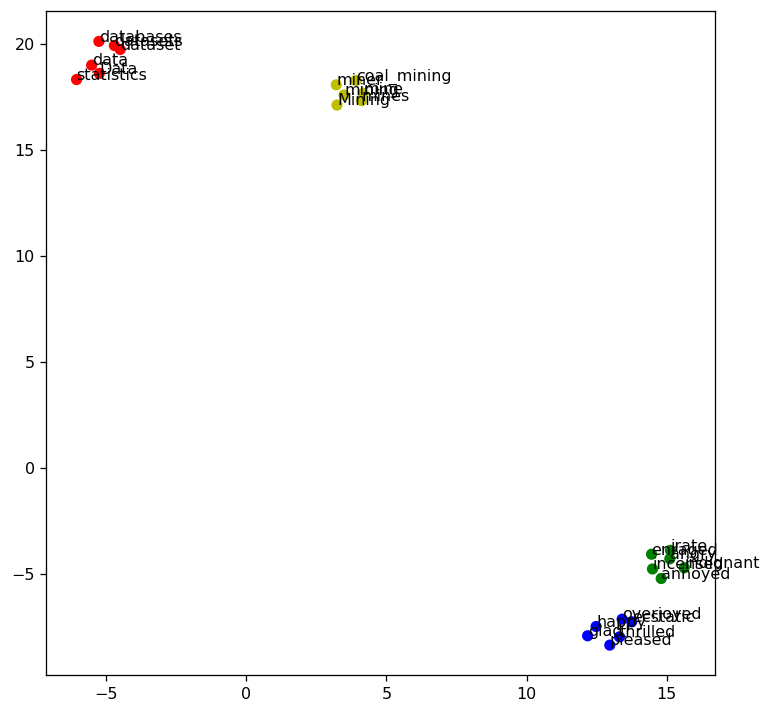

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

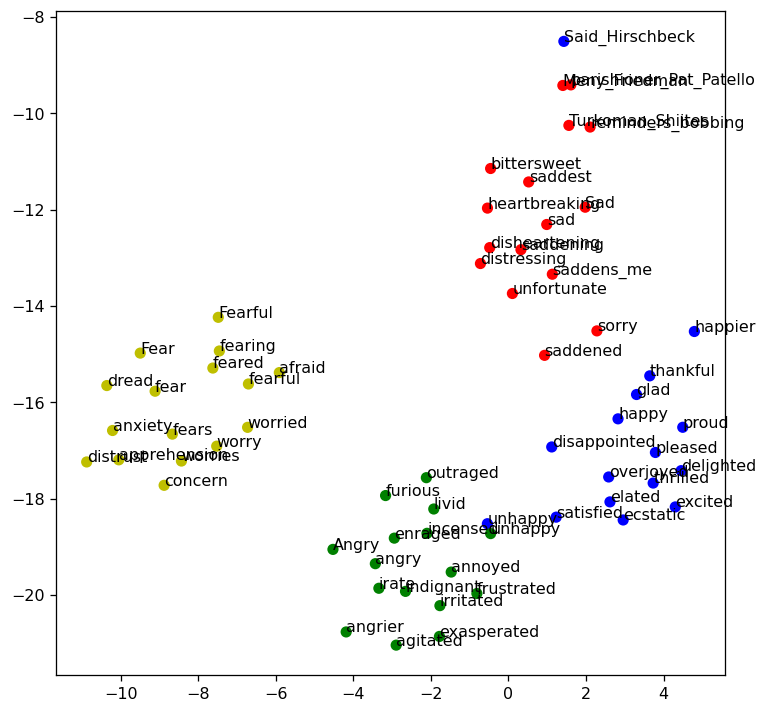

In [104]:
# Answer here
EMO = ['angry', 'happy', 'sad', 'fear']
topn = 15

happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---

# Part 2

## 0. Import Package

In [5]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import sklearn
import helpers.data_mining_helpers as dmh
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import json

%matplotlib inline

## 1. Data Preparation
### 1.1 Load data

In [6]:
# read csv file
import json

DATA_FOLDER = 'data/'
data_identification = pd.read_csv(DATA_FOLDER+"data_identification.csv")
emotion = pd.read_csv(DATA_FOLDER+"emotion.csv")
#read json file line by line
tweet_lst = []
with open(DATA_FOLDER+'tweets_DM.json') as tweet_file:
        for line in tweet_file:
            tweet_lst.append(json.loads(line))

t_id= []
t_text = []
for t in tweet_lst:
    t_id.append(t["_source"]["tweet"]["tweet_id"])
    t_text.append(t["_source"]["tweet"]["text"])

tweet_data = pd.DataFrame({'tweet_id':t_id, 'text':t_text})
tweet_data = pd.read_csv('data/tweet_data.csv')


### 1.2 Separate data

In [7]:
test_id = data_identification[data_identification['identification']=='test']
train_id = data_identification[data_identification['identification']=='train']
train_id = train_id.drop(['identification'], axis=1)
test_id = test_id.drop(['identification'], axis=1)

data_Y = pd.merge(train_id, emotion)
data_X = pd.merge(data_Y, tweet_data)
data = data_X

data_X = data_X.drop(columns='emotion')
predict = pd.merge(test_id, tweet_data)

#### encode emotion into int

In [8]:
back_to_emotion  = {0:"anger", 1:"anticipation", 2:"disgust", 3:"fear", 4:"joy", 5:"sadness", 6:"surprise", 7:"trust"}
RESULT_FOLDER = 'result/'
sent_to_id  = {"anger":0, "anticipation":1,"disgust":2,"fear":3,"joy":4,
                        "sadness":5,"surprise":6,"trust":7}
data_Y['emotion'] = data_Y['emotion'].map(sent_to_id)
# data_X['emotion'] = data_X['emotion'].map(sent_to_id)

#### split into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_Y.drop(columns='tweet_id'), test_size=0.33, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

#### save data as pickle

In [10]:
FOLDER = 'data/'
## save to pickle file
train_df.to_pickle(FOLDER + "train_df.pkl") 
test_df.to_pickle(FOLDER + "test_df.pkl")
predict.to_pickle(FOLDER + "predict_df.pkl")

#### function for transforming into submission format

In [11]:
def submit(predict, filename):
    submission = pd.DataFrame()
    submission['id'] = predict['tweet_id']
    submission['emotion'] = predict['emotion'].map(back_to_emotion)
    submission.to_csv(RESULT_FOLDER+'submit'+str(filename)+'.csv', index=False)

### 1.2 Data exploration

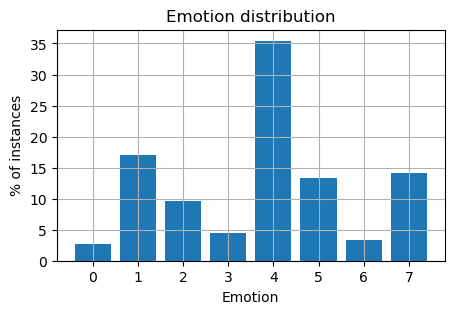

In [12]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

'joy' has much more data than other, so do some downsampling

In [15]:
# I have already encode 'joy' to 4
gp = train_df.groupby(['emotion'])
downsize_joy = train_df[train_df.emotion != 4]
JOY = gp.get_group(4)
downsize_joy =  downsize_joy.append(JOY.sample(170000))
train_df = downsize_joy

C:\Users\huang\AppData\Local\Temp\ipykernel_24496\4219476103.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsize_joy =  downsize_joy.append(JOY.sample(170000))


### 1.3 Preprocessing
#### remove mention and url

In [16]:
import re
import emoji
tweet_data = pd.read_pickle(FOLDER + "tweet_data.pkl")

In [17]:
def cleaning_mention_url(text):
    return (re.sub(r"(?:\@|https?\://)\S+", "", text))
tweet_data['clean_text'] = tweet_data['text'].apply(lambda text: cleaning_mention_url(text))
tweet_data['clean_text'].head()

0    People who post "add me on #Snapchat" must be ...
1     As we see, Trump is dangerous to #freepress a...
2    Confident of your obedience, I write to you, k...
3                  Now ISSA is stalking Tasha 😂😂😂 <LH>
4    "Trust is not the same as faith. A friend is s...
Name: clean_text, dtype: object

#### remove stop words

In [18]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english')) 
STOPWORDS.add('LH')
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweet_data['clean_text'] = tweet_data['clean_text'].apply(lambda text: cleaning_stopwords(text))
tweet_data['clean_text'].head()

0    People post "add #Snapchat" must dehydrated. C...
1    As see, Trump dangerous #freepress around worl...
2    Confident obedience, I write you, knowing even...
3                     Now ISSA stalking Tasha 😂😂😂 <LH>
4    "Trust faith. A friend someone trust. Putting ...
Name: clean_text, dtype: object

#### remove punctuations

In [19]:
import string
english_punctuations = string.punctuation
# punctuations_list = english_punctuations
punctuations_list = '"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'

def cleaning_punctuations(text):
    translator = str.maketrans(' ', ' ', punctuations_list)
    return text.translate(translator)
tweet_data['clean_text']= tweet_data['clean_text'].apply(lambda x: cleaning_punctuations(x))
tweet_data['clean_text'].head()

0    People post add Snapchat must dehydrated Cuz m...
1    As see Trump dangerous freepress around world ...
2    Confident obedience I write you knowing even I...
3                       Now ISSA stalking Tasha 😂😂😂 LH
4    Trust faith A friend someone trust Putting fai...
Name: clean_text, dtype: object

#### remove repeated words

In [20]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
tweet_data['clean_text'] = tweet_data['clean_text'].apply(lambda x: cleaning_repeating_char(x))
tweet_data['clean_text'].head()

0    People post add Snapchat must dehydrated Cuz m...
1    As see Trump dangerous freepress around world ...
2    Confident obedience I write you knowing even I...
3                       Now ISSA stalking Tasha 😂😂😂 LH
4    Trust faith A friend someone trust Putting fai...
Name: clean_text, dtype: object

#### remove number

In [21]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tweet_data['clean_text'] = tweet_data['clean_text'].apply(lambda x: cleaning_numbers(x))
tweet_data['clean_text'].tail()

1867530    When buy last  tickets remaining show sell out...
1867531             I swear hard work gone pay one day😈💰💸 LH
1867532                     card left I I idea get parcel LH
1867533    Ah corporate life date LH using relative anach...
1867534                        Blessed living Sundayvibes LH
Name: clean_text, dtype: object

#### convert emoji to word

In [22]:
tweet_data['clean_text'] = tweet_data['clean_text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

#### convert slang chat word to normal word
[refernce](https://github.com/rishabhverma17/sms_slang_translator.git)

In [23]:
with open('data/slang.txt', 'r') as file:
    chat_words_str = file.read().rstrip()
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

tweet_data['clean_text'] = tweet_data['clean_text'].apply(lambda x: chat_words_conversion(x))

IndexError: list index out of range

#### save the clean text to csv

In [24]:
tweet_data.to_csv(FOLDER+'clean_tweet.csv')

## 2. Feature Engineering
### 2.1 Bag of Words

In [25]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)

In [26]:
# 2. Transform documents to document-term matrix.
train_data_BOW_features = count_vect.transform(train_df['text'])
test_data_BOW_features = count_vect.transform(test_df['text'])

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\huang\.conda\envs\data_mining\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(799543, 500)

### 2.2 TFIDF

In [27]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
TFIDF_result =  TFIDF_500.fit_transform(train_df['text'])
TFIDF_feature_names_500 = TFIDF_500.get_feature_names_out()
TFIDF_feature_names_500[100:110]

array(['came', 'can', 'car', 'care', 'change', 'christ', 'closed', 'come',
       'comes', 'coming'], dtype=object)

## 3. Model
### 3.1 Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (799543, 500)
y_train.shape:  (799543,)
X_test.shape:  (480336, 500)
y_test.shape:  (480336,)


In [29]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.97
testing accuracy: 0.38


In [30]:
X_pred = BOW_500.transform(predict['text'])
y_pred = DT_model.predict(X_pred)

In [31]:
TTMP = predict
TTMP['emotion'] = pd.DataFrame(y_pred)
submit(TTMP,0)

In [32]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.97
testing accuracy: 0.38


plot confusion matrix base on Decision Tree prediction result

In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [34]:
def plot_confusion_matrix(test, pred, title):        
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(test, pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

    ax.set_title('\n'+title +'Confusion Matrix\n', fontsize = 16)
    ax.set_xlabel('\nPredicted Values', fontsize = 12)
    ax.set_ylabel('Actual Values ', fontsize = 12)

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'], fontsize = 12)
    ax.yaxis.set_ticklabels(['False','True'], fontsize = 12)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (2).

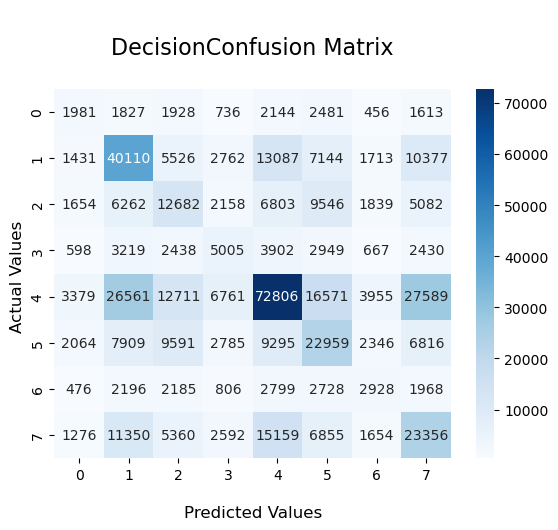

In [35]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
# plot your confusion matrix
my_tags = ['anger', 'anticipation', 'disgust','fear', 'joy', 'sadness', 'surprise', 'trust']
plot_confusion_matrix(y_test, y_test_pred, 'Decision')

#### Comments
Decision shows the tendency to overfitting

### 3.2 MLP
#### Tokenize

In [39]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
BOW_500 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
BOW_500.fit(data['text'])
X_train = BOW_500.transform(train_df['text'])
X_valid = BOW_500.transform(test_df['text'])
test_emb = BOW_500.transform(predict['text'])
y_train = train_df['emotion']
y_valid = test_df['emotion']

c:\Users\huang\.conda\envs\data_mining\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Encode the emotion

In [40]:
from tensorflow import keras
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
def label_encode(le, labels):
    enc = le.transform(labels)
    return utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_valid = label_encode(label_encoder, y_valid)

#### Build MLP model

In [41]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  1000
output_shape:  8


In [42]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=400)(X)
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=200)(H1)
H2 = ReLU()(H1_W2)

# 2nd hidden layer
H2_W3 = Dense(units=200)(H2)
H3 = ReLU()(H2_W3)

# output layer
H3_W4 = Dense(units=output_shape)(H3)
H4 = Softmax()(H3_W4)

model_output = H4

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 400)               400400    
                                                                 
 re_lu (ReLU)                (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 re_lu_1 (ReLU)              (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 re_lu_2 (ReLU)              (None, 200)               0     

In [43]:
# training setting
epochs = 50
batch_size = 64

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (X_train, y_train))

Epoch 1/50


c:\Users\huang\.conda\envs\data_mining\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 400), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


12493/12493 [==============================] - 82s 6ms/step - loss: 1.4371 - accuracy: 0.4611 - val_loss: 1.3483 - val_accuracy: 0.4987
Epoch 2/50
12493/12493 [==============================] - 82s 6ms/step - loss: 1.3573 - accuracy: 0.4940 - val_loss: 1.2939 - val_accuracy: 0.5218
Epoch 3/50
12493/12493 [==============================] - 82s 6ms/step - loss: 1.3099 - accuracy: 0.5134 - val_loss: 1.2464 - val_accuracy: 0.5417
Epoch 4/50
12493/12493 [==============================] - 87s 7ms/step - loss: 1.2678 - accuracy: 0.5304 - val_loss: 1.1960 - val_accuracy: 0.5611
Epoch 5/50
12493/12493 [==============================] - 87s 7ms/step - loss: 1.2304 - accuracy: 0.5445 - val_loss: 1.1635 - val_accuracy: 0.5740
Epoch 6/50
12493/12493 [==============================] - 88s 7ms/step - loss: 1.1967 - accuracy: 0.5579 - val_loss: 1.1288 - val_accuracy: 0.5873
Epoch 7/50
12493/12493 [==============================] - 96s 8ms/step - loss: 1.1656 - accuracy: 0.5701 - val_loss: 1.0945 - val

#### Prediction 

In [44]:
pred = model.predict(test_emb)
pred_list = label_decode(label_encoder,pred).tolist()
output = pd.DataFrame({'emotion': pred_list})
predict['id'] =predict['tweet_id']
prediction = pd.concat([predict['id'], output], axis=1)

prediction.to_csv('result/prediction_MLP_b64.csv',index=False)

12875/12875 [==============================] - 30s 2ms/step


#### Comments
MLP performs better than decision tree. After fine-tuning the model parameters, the performance can reach around 0.4 on the public test on Kaggle.

### 3.3 LSTM

In [45]:
FOLDER = 'data/'
df_train = pd.read_csv(FOLDER + "train_scalar_emotion.csv", encoding = 'unicode_escape')
df_val = pd.read_csv(FOLDER + "test_scalar_emotion.csv", encoding = 'unicode_escape')
predict = pd.read_csv(FOLDER + "predict_scalar_emotion.csv", encoding = 'unicode_escape')
df = pd.concat([train_df, test_df])
df['text'] = df['text'].astype(str)

In [46]:
tweets = (df_train['text'].astype(str)).to_list()
labels = df_train['emotion'].tolist()
classes = set(labels)
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])
train_labels = names_to_ids(labels)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

In [ ]:
MAX_LEN = 100

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=MAX_LEN, padding='post')
    return padded_sequences
padded_train_sequences = get_sequences(tokenizer, tweets)

NameError: name 'tokenizer' is not defined

In [38]:
from tensorflow.compat.v1.keras.layers import LSTM

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 256, input_length=MAX_LEN),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(MAX_LEN, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(MAX_LEN)),
    tf.keras.layers.Dense(8, activation='softmax')
])




model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

NameError: name 'tf' is not defined

for loading model

In [ ]:
import keras
# model = keras.models.load_model("result/LSTMmaxlen100_e6.h5")

In [ ]:
val_tweets = (df_val['text'].astype(str)).tolist()
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = df_val['emotion'].tolist()

In [ ]:
h = model.fit(
    padded_train_sequences, train_labels,
    # validation_data=(val_sequences, val_labels),
    epochs=1,
    batch_size=64,
)
model.save("result/LSTMmaxlen100_e7.h5", save_format = "tf")

predict data

In [ ]:
back_to_emotion  = {0:"anger", 1:"anticipation", 2:"disgust", 3:"fear", 4:"joy", 5:"sadness", 6:"surprise", 7:"trust"}
sent_to_id  = {"anger":0, "anticipation":1,"disgust":2,"fear":3,"joy":4,
                        "sadness":5,"surprise":6,"trust":7}

In [ ]:
test_tweets = predict['text'].tolist()
test_sequences = get_sequences(tokenizer, test_tweets)
preds = model.predict(test_sequences)
LSTM_pred_list = np.argmax(preds, axis=1)
id2name = lambda labels: np.array([index_to_classes.get(x) for x in LSTM_pred_list])
LSTM_id2name = id2name(LSTM_pred_list)
df_LSTM = predict[['tweet_id']]
df_LSTM = df_LSTM.reset_index(drop=True)
df_LSTM['emotion']=pd.Series(LSTM_id2name)
df_LSTM.columns = ['id', 'emotion']
df_LSTM =  df_LSTM.dropna()
df_LSTM['emotion'] = df_LSTM['emotion'].map(back_to_emotion)
df_LSTM.to_csv('result/LSTM_test_pred_e7_transfer.csv', index=False)

#### Comments
LSTM public score 0.46. I think it's better than MLP for its more complex, so maybe it suits better for nlp.

---

# Part 3
## Report
### 1. Preprocessing

#### Training data
I observed that the data is extremely imbalanced. Too many 'joy' tweet and very little amount of certain emotions. The imbalanced data usually may cause trouble during training, making the model have more tendacy to predict 'joy'. So I downsize the 'joy' data. But after several trials, I didn't achieve better result.\
First of all, although the model have more equal prediction out of eight emotions, the testing data on Kaggle are also highly imbalanced, with up to 30% of the data is 'joy'. So the model still needs to able to predict large amount of 'joy'. Secondly, after observing some tweets in the data, I discovered that some tweets that are more neutral but still categorized as 'joy'. It can be hard for model to predict and resulting in prediction of neutral tweet as 'joy'. 
#### Data cleaning
For the data is directly from actual tweet online, the tweets are very messy. I think that they contain many words, punctuations, and so on, which are not helpgful for the sentiments analysis.\
By removing stop words, mention, url, punctuations, and also converting emoji into words, I convert the original text into only containing context that are related to the sentiment.\
But after comparing training result between original tweet data and the cleaned text after preprocessing, the training result is very alike, sometimes even original tweet has better prediction score. The reason I think is maybe related to over cleaning the data, accidently remove the data that are sentiment related. Another reason maybe is that using tokenizer may have similar effect on the data, extracting most frequent used words.
#### Training model
I have implemented three types of model for this dataset : Decision Tree, Neural Network, and LSTM.
##### Decision Tree
It has the worst reult out of all three model. I think it is because the structure of the model is too simple for natural languange processing. Also, it may easily overfit on the training dataset.
##### Neural Network
I was able to achieve better result using MLP than decision tree. Finetuning the model parameters, such as layers structure, batch size, number of epochs, resulting in even better prediction result. Comparing to decision tree, it is more capable dealing with complex data. But I had a hard time raising the prediction score higher after 0.36.
##### LSTM
To my opinion, it is an integration of MLP, with more complicated layer design. It design suits better with higher dimension of dataset, which can be using when doing natural language processing. As the result, I got the best score on Kaggle using this model.

#### Other method I tried
##### Using pretrained model to scalarize the emotion
I have tried using package provided online, which can scalarize the text based on its sentiments, such as positive, neutral, subjective... After scalarizing the tweets, and use MLP for prediction, I recieved 0.3 score on Kaggle. But the process is very time consuming and I am not sure if this method is appropriate on this homework, so I didn't use it any further.
